# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy
# !pip3 install nltk
# !pip3 install wordcloud


# Standard python packages
import os
import sys
import string
# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd
import nltk


# if uising a Jupyter notebook, include:

# Visualization packages
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

## Appendix 1 - Environment Configuration

In [4]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [5]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items / 3 errors / 2 selected                                      

==================================== ERRORS ====================================
____________ ERROR collecting ner-accidente/tests/test_notebook.py _____________
import file mismatch:
imported module 'test_notebook' has this __file__ attribute:
  /notebooks/ml_basic/tests/test_notebook.py
which is not the same as the test file we want to collect:
  /notebooks/ner-accidente/tests/test_notebook.py
HINT: remove __pycache__ / .pyc files and/or use a unique basename for your test file modules
_ ERROR collecting ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py _
import file mismatch:
imported module 'test_add_value_to_numpy' has this __file__ attribute:
  /notebooks/ml_basic/tests/ml_b

In [6]:
# import our dataSet for analysis
path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv')
# print(path)

df = pd.read_csv(path)
# print(f"Loaded {accident_data.shape[0]} samples.")

# select the only the rows that has marked words y=1
# df = df.loc[df['y'] == 1]


print(df)

      id  y                                               text  com
0      0  1  un sofer a tamponat o femeie pe trecerea pieto...  NaN
1      1  1  aseara jurul orei 2330 politia capitalei a fos...  NaN
2      6  1  accidentul s a intamplat aceasta dimineata pe ...  NaN
3      7  1  un pieton a fost spulberat mortal aseara un ta...  NaN
4     10  1  accidentul a avut loc sectorul botanica pe ||s...  NaN
..   ... ..                                                ...  ...
150  370  1  intersectia strazilor ||vadul|| ||lui|| ||voda...  NaN
151  371  1  un accident lant a avut loc aceasta dimineata ...  NaN
152  373  1  potrivt politei accidentul a avut loc acum o o...  NaN
153  375  1  accidentul s a produs astazi intersectia ||bul...  NaN
154  376  1  un barbat moarte dupa ce inima acestuia s a op...  NaN

[155 rows x 4 columns]


In [7]:
# TIME TO CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg

#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_style("dark")

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()

# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [8]:
# pass it a list for it to generate a word-cloud with all the words in that list
def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print(all_words)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# pass it a list so that it generate an (x,y) plot where x is the words and y is the occurance of that word
def plot_word_freq(text_to_plot, title='Placeholder title'):
    fd2 = nltk.FreqDist(word for word in text_to_plot)      
    x=[fd2.most_common(55)[i][0] for i in range(55)]
    y=[fd2.most_common(55)[i][1] for i in range(55)]
    #palette=sns.color_palette("PuBuGn_d",100)
    palette= sns.light_palette("crimson",100,reverse=True)
    plt.figure(figsize=(65,25))
    ax= sns.barplot(x, y, alpha=0.8,palette=palette)
    plt.title(title, fontsize=110)
    plt.ylabel('Occurrences', fontsize=190)
    plt.xlabel(' Word ', fontsize=110)
    #adding the text labels
    rects = ax.patches
    labels = y
    sns.set(font_scale=3)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
        plt.xticks(rotation=90, fontsize=50)
    #plt.savefig('Toxic_Word_count1.png')    
    plt.show()
    
# pass it a dataframe column and it will go over them to extract all the entities that it has and displays them
def detect_entities_in_dataframe(dataframe):
    for sentence in dataframe:
        ## print named entities in phrases
        sentence_nlp = nlp(sentence)
        print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])
        # # visualize named entities
        displacy.render(sentence_nlp, style='ent', jupyter=True)

# pass it 2 lists of words and it will create a new list with all the words that appear in both lists and how many times
def get_words_appearing_in_both(marked_words, unmarked_words):
    words_that_appear_in_both = []
    for word in unmarked_words:
        if word in marked_words:
            words_that_appear_in_both.append(word)
    return words_that_appear_in_both




def get_how_many_entities_and_non_entities_per_phrase(dataframe):
    all_entities = {}
    all_non_entities = {}
    # Dic that will hold the number of words that are in "all_entities" and "all_non_entities"
    num_all_entities = {}
    num_all_non_entities = {}
    sentence_index = -1
    for sentence in dataframe:
        entities = []
        non_entities = []
        sentence_index += 1
        for i in sentence.split():
            i_processed = i.replace("|","")
            if "|" in i:
                entities.append(i_processed)
            else: 
                non_entities.append(i_processed)
#         print(f'IN ROW:{sentence_index} there are {len(entities)}={entities} entities in this phrase and {len(non_entities)}={non_entities} non_entities')
        
        all_entities[sentence_index] = entities
        all_non_entities[sentence_index] = non_entities
        
        num_all_entities[sentence_index] = int(len(entities))
        num_all_non_entities[sentence_index] = int(len(non_entities))
        
    return all_entities, all_non_entities, num_all_entities, num_all_non_entities

# print(all_entities)

# Parse and analyse the whole text corpus

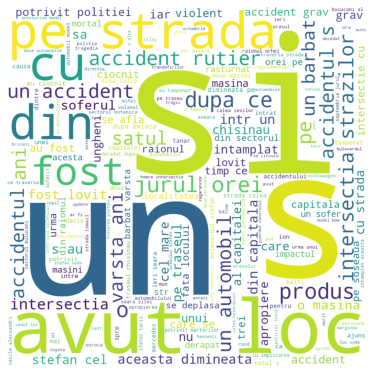

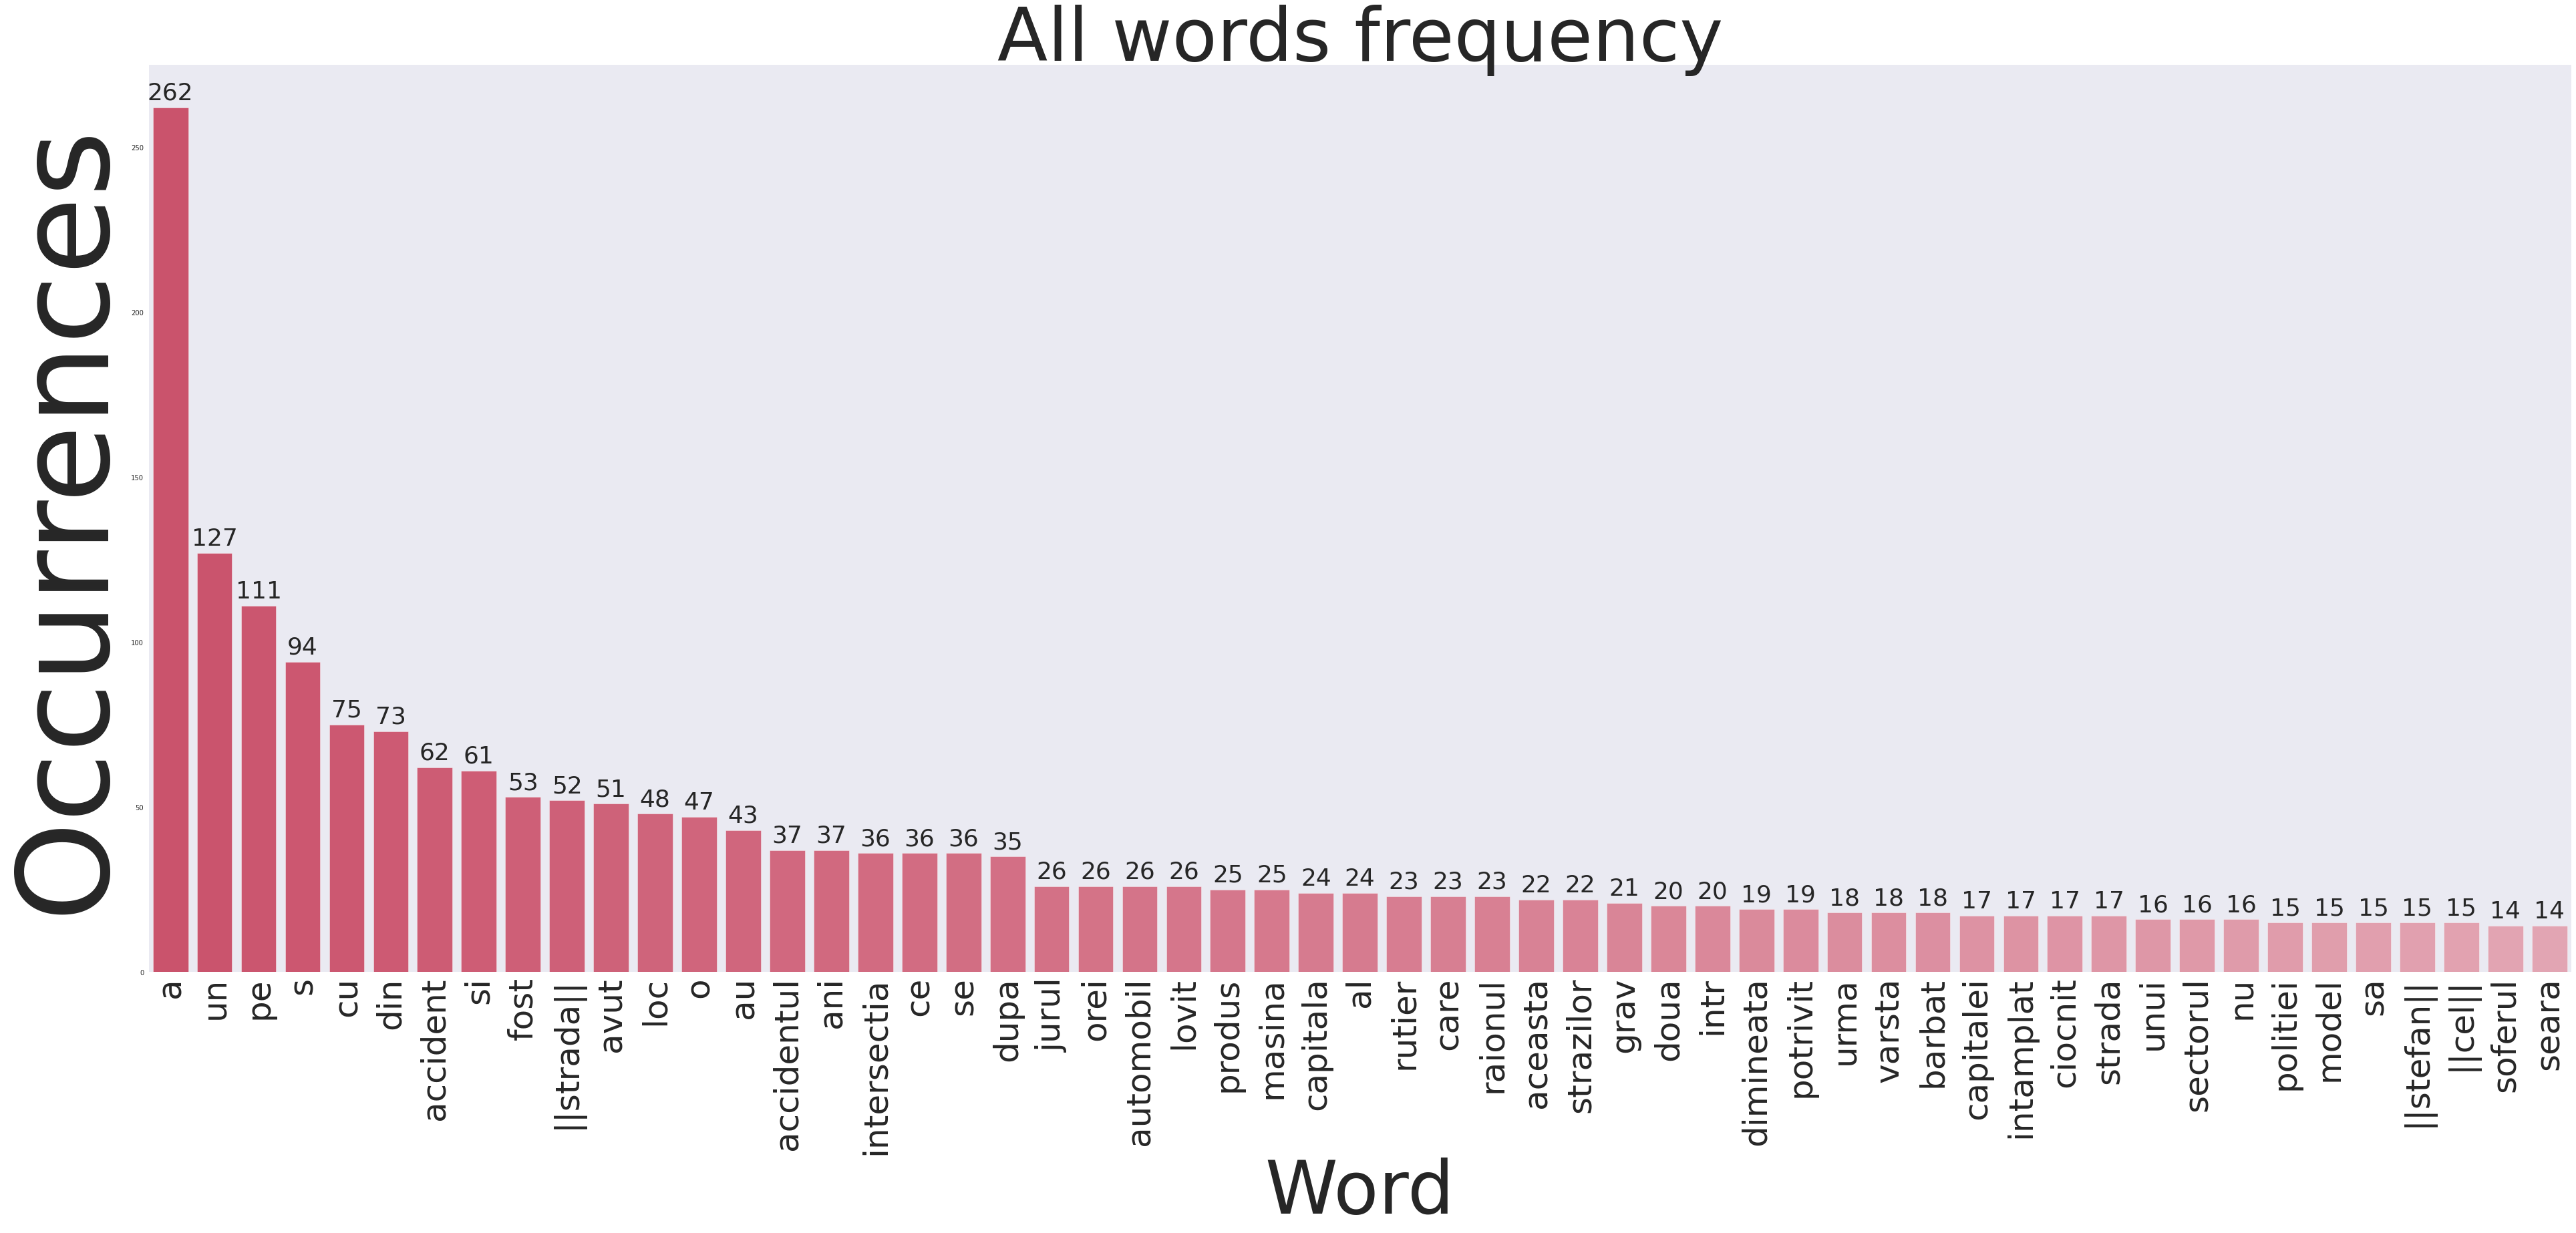

({0: ['bd', 'decebal', 'strada', 'trandafirilor'],
  1: ['traseul', 'spre', 'localitatea', 'cheltuitori'],
  2: ['soseaua', 'muncesti'],
  3: ['soseaua', 'muncesti'],
  4: ['strada', 'trandafirilor'],
  5: ['bulevardelor', 'dacia', 'traian'],
  6: ['columna', 'maria', 'cebotari'],
  7: ['columna', 'maria', 'cebotari:'],
  8: ['columna', 'maria', 'cebotari:'],
  9: ['ivano', 'franco', 'bulgara'],
  10: ['strada', 'mihai', 'viteazul'],
  11: ['sfatul', 'ocsfatul', 'tarii', 'stefan'],
  12: ['strada', 'calea', 'iesilor', 'apropiere', 'mesager'],
  13: ['strada', 'calea', 'iesilor'],
  14: ['alba', 'iulia', 'sucevita'],
  15: ['alba', 'iulia', 'paris'],
  16: ['vissarion', 'capition', 'belinski', 'strada', 'pelivan'],
  17: ['strada', 'alba', 'iulia', '75/22'],
  18: ['strada', 'sarmisegetuza'],
  19: ['bulevardul', 'stefan', 'cel', 'mare', 'strada', 'petru', 'movila'],
  20: ['traseul', 'budesti', 'cruzesti'],
  21: ['traseul', 'chisinau', 'hancesti', 'intersectie', 'satul', 'danceni'],
 

In [9]:
# df['text'] = df['text'].str.replace('\xa0',' ')
# df['text'] = df['text'].str.replace('|',' ')
# df['text'] = df['text'].str.replace('   ',' ')
# df['text'] = df['text'].str.replace('  ',' ')
# df['text'] = df['text'].str.replace('  ',' ')

all_corpus_text = []
for phrases in df["text"]:
    phrases = phrases.split(" ")
    for words in phrases:
        all_corpus_text.append(words)

generate_cloud(df["text"])          
plot_word_freq(all_corpus_text, title='All words frequency')
get_how_many_entities_and_non_entities_per_phrase(df['text']) 

# Parse and analyse the marked words from the text-corpus

# Add columns to our df from the values extracted from the 

528


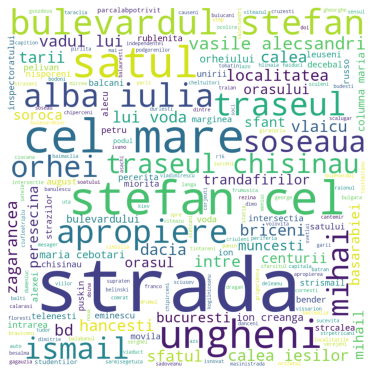

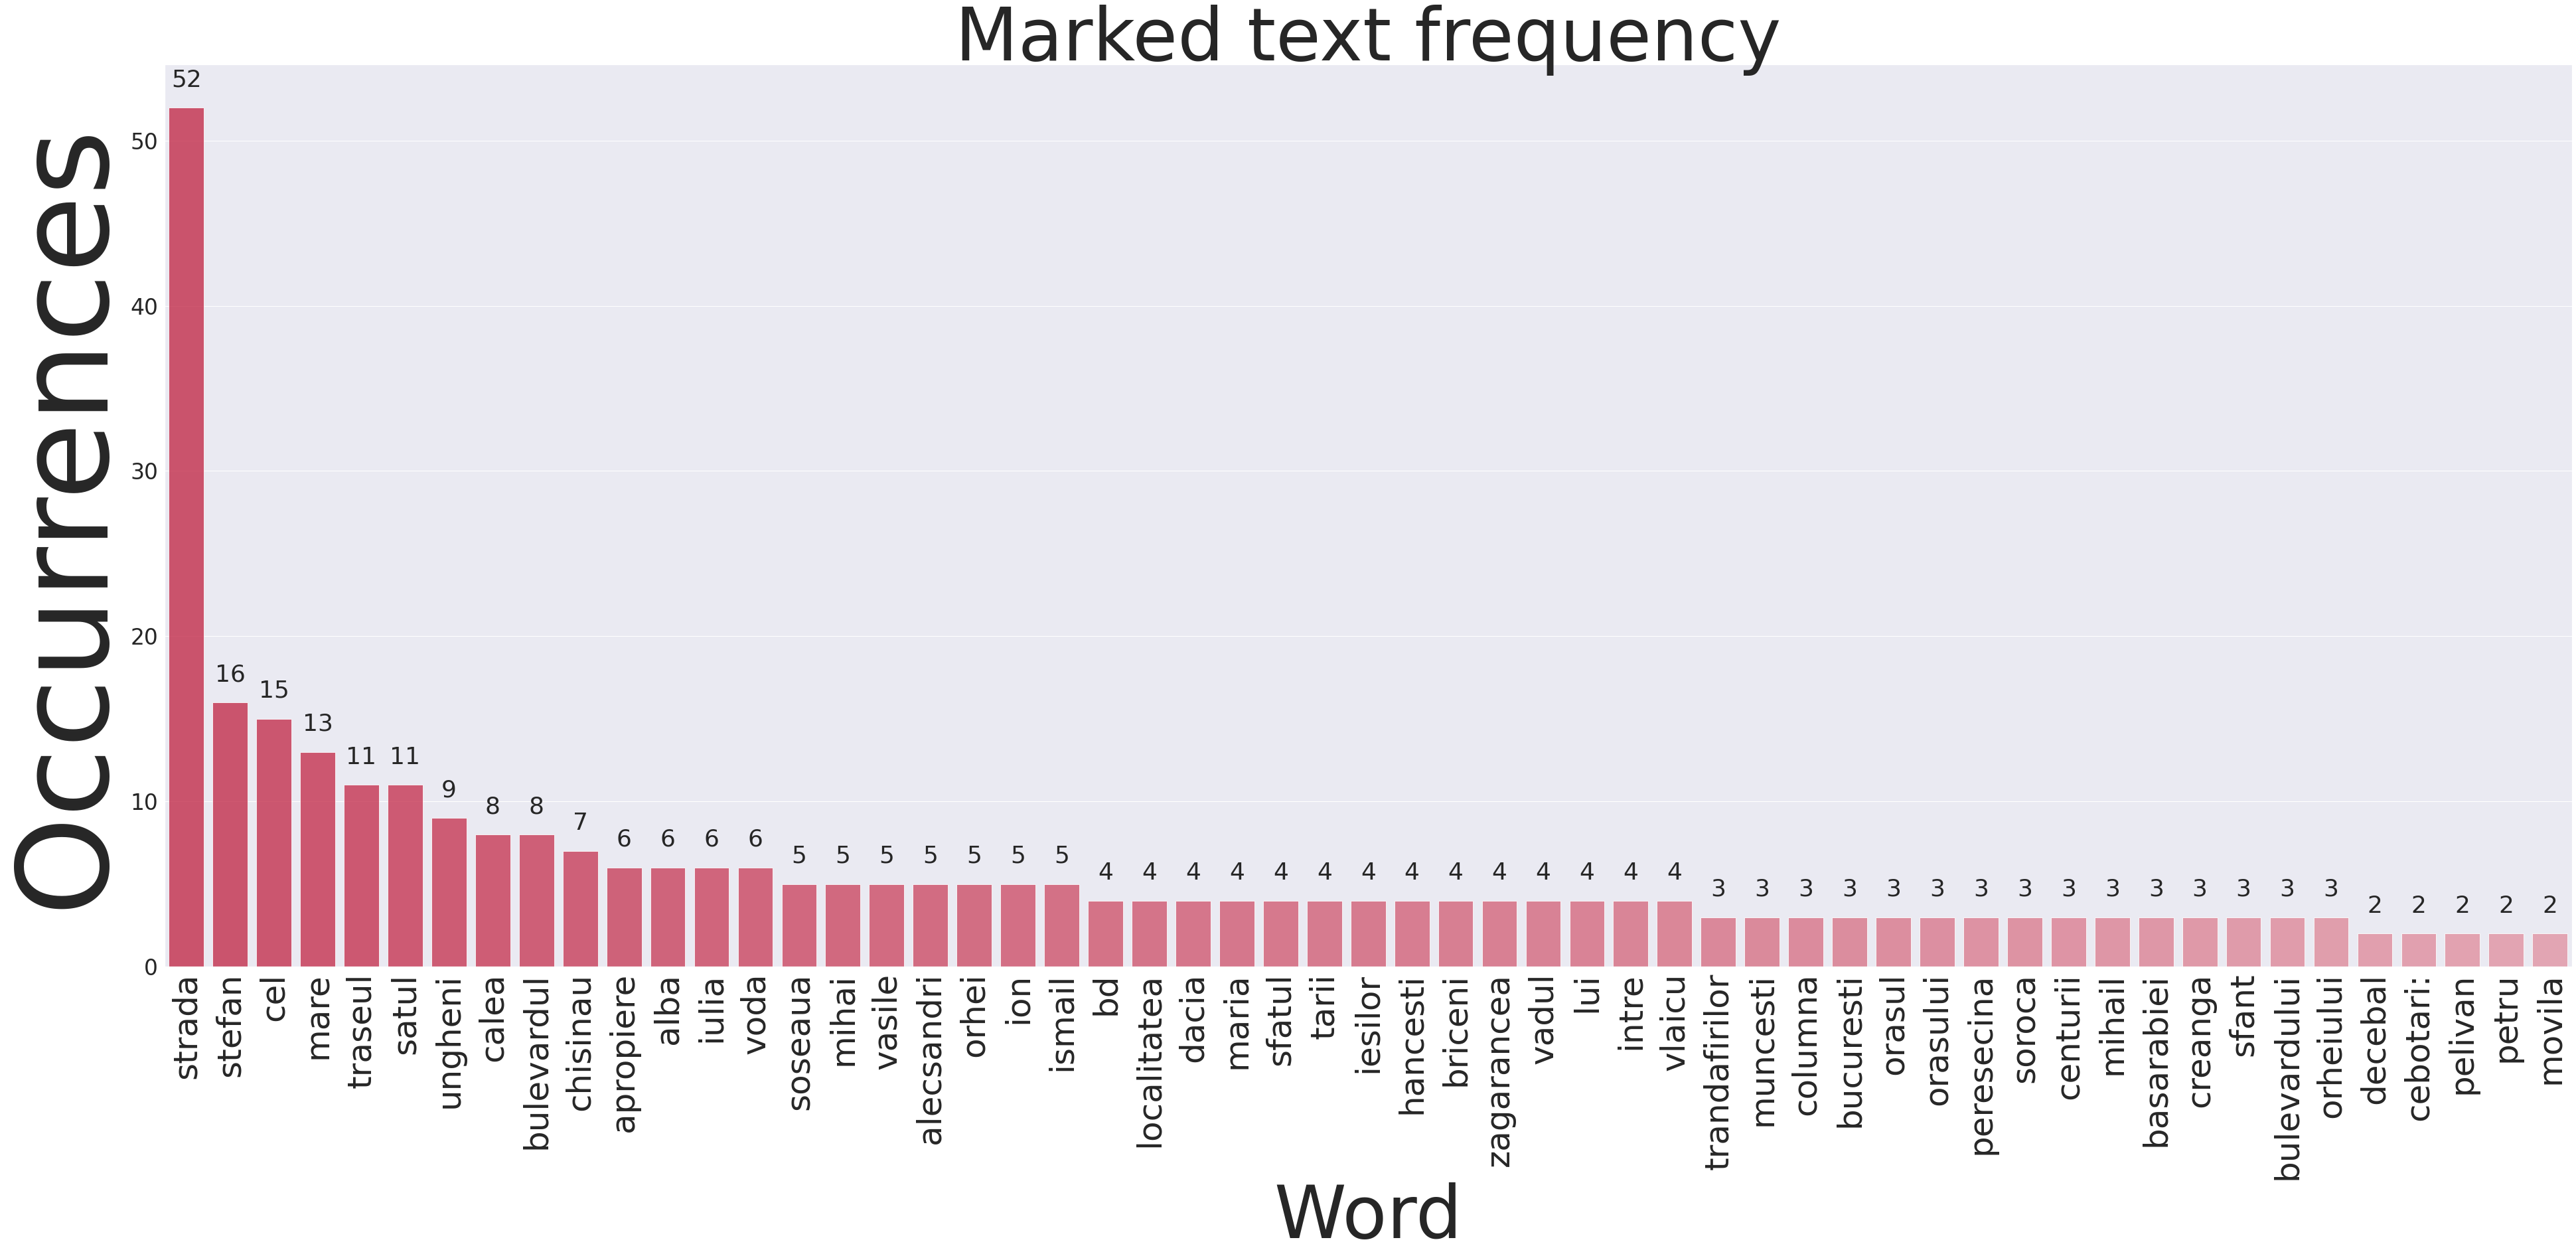

In [10]:
all_marked_text = []
all_unmarked_text = []
for phrases in df['text_no_sw']:
#     print('1' + phrases)
    phrases = phrases.split(" ")
    for words in phrases:
#         print(phrases)
        i_processed = words.replace("|","")
        if "|" in words:
            all_marked_text.append(i_processed)
        else:
            all_unmarked_text.append(words)

# Visualize text that has not been annotated    

print(len(all_marked_text))
generate_cloud(all_marked_text)
plot_word_freq(all_marked_text, title='Marked text frequency')
dict_all_entities, dict_all_non_enteties, dict_num_all_entities, dict_num_all_non_entities \
    = get_how_many_entities_and_non_entities_per_phrase(df['text_no_sw'])

# print(all_entities)
# print(all_non_entities)
# Add new columns to the dataframe

# Create column based on the index that is in the column
df['all_enteties'] = df.index
df['all_non_enteties'] = df.index
df['num_all_enteties'] = df.index
df['num_all_non_enteties'] = df.index

# Assign to the previously created column the dictionaries with the values
df['all_enteties'] = pd.Series(dict_all_entities)
df['all_non_enteties'] = pd.Series(dict_all_non_enteties)
df['num_all_enteties'] = pd.Series(dict_num_all_entities)
df['num_all_non_enteties'] = pd.Series(dict_num_all_non_entities)

# Parse and analyse the unmarked words from the text-corpus

2110


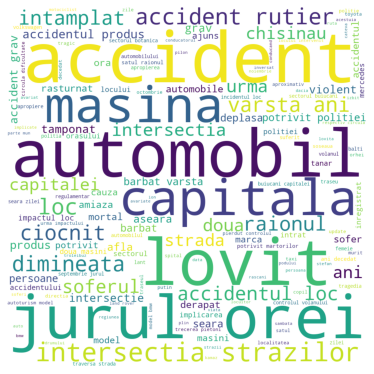

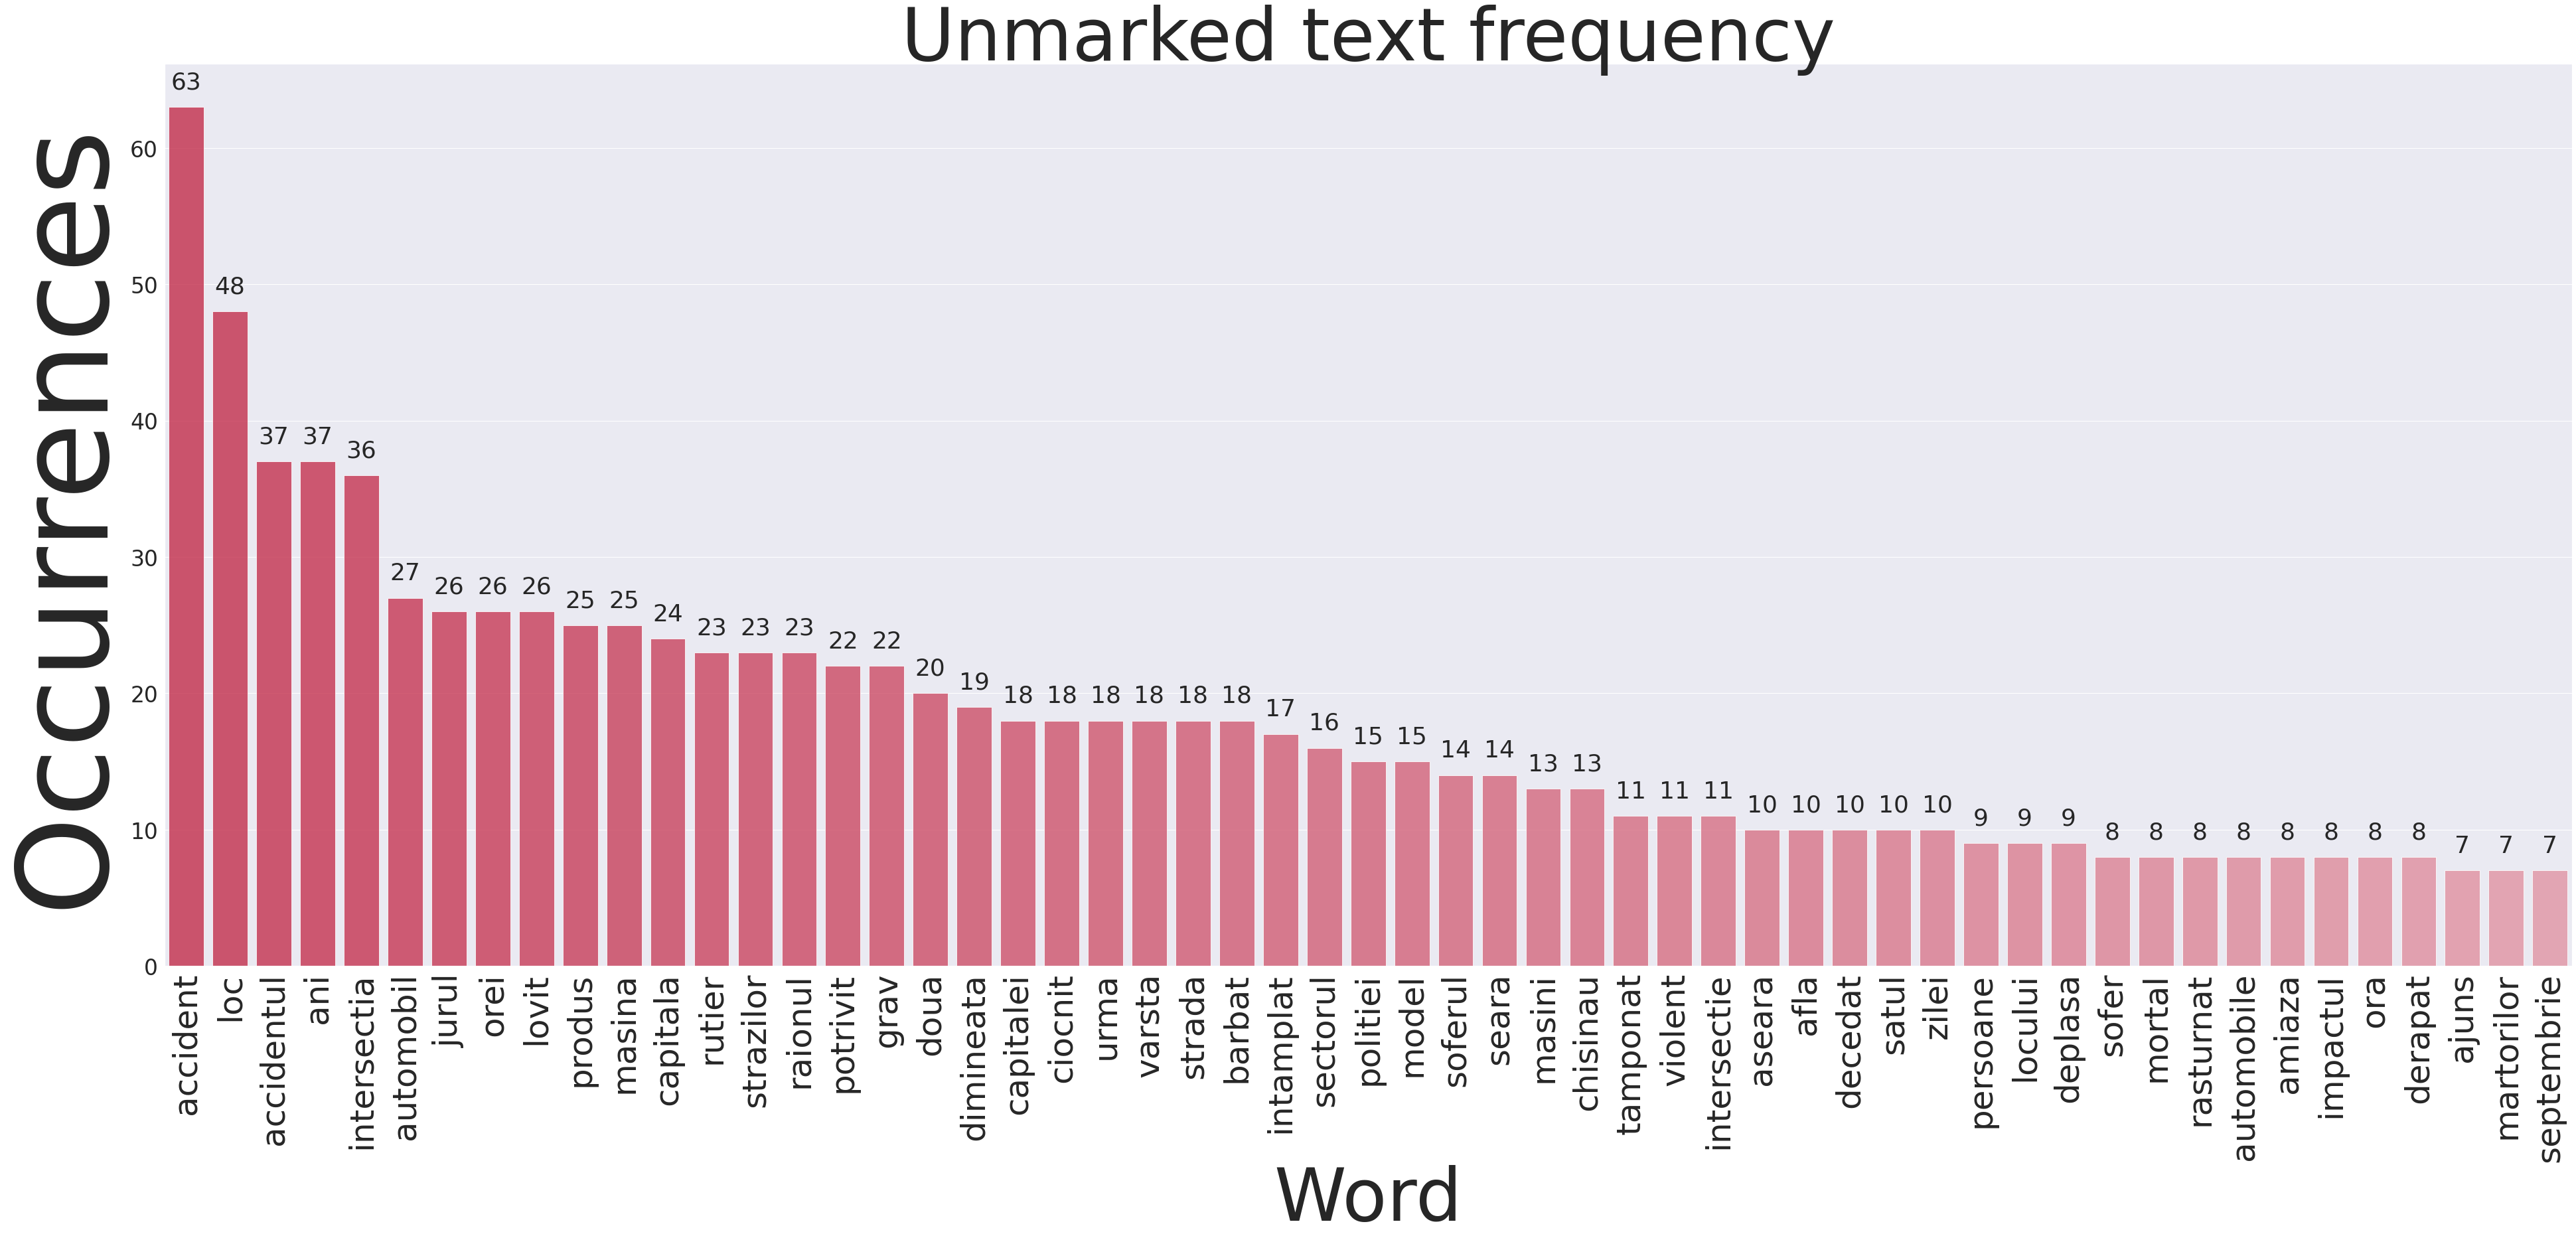

In [11]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

# Parse and analyse words from both marked and unmarked text-corspus

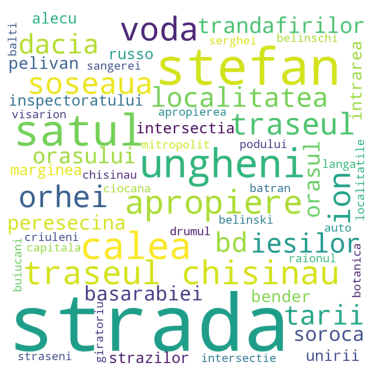

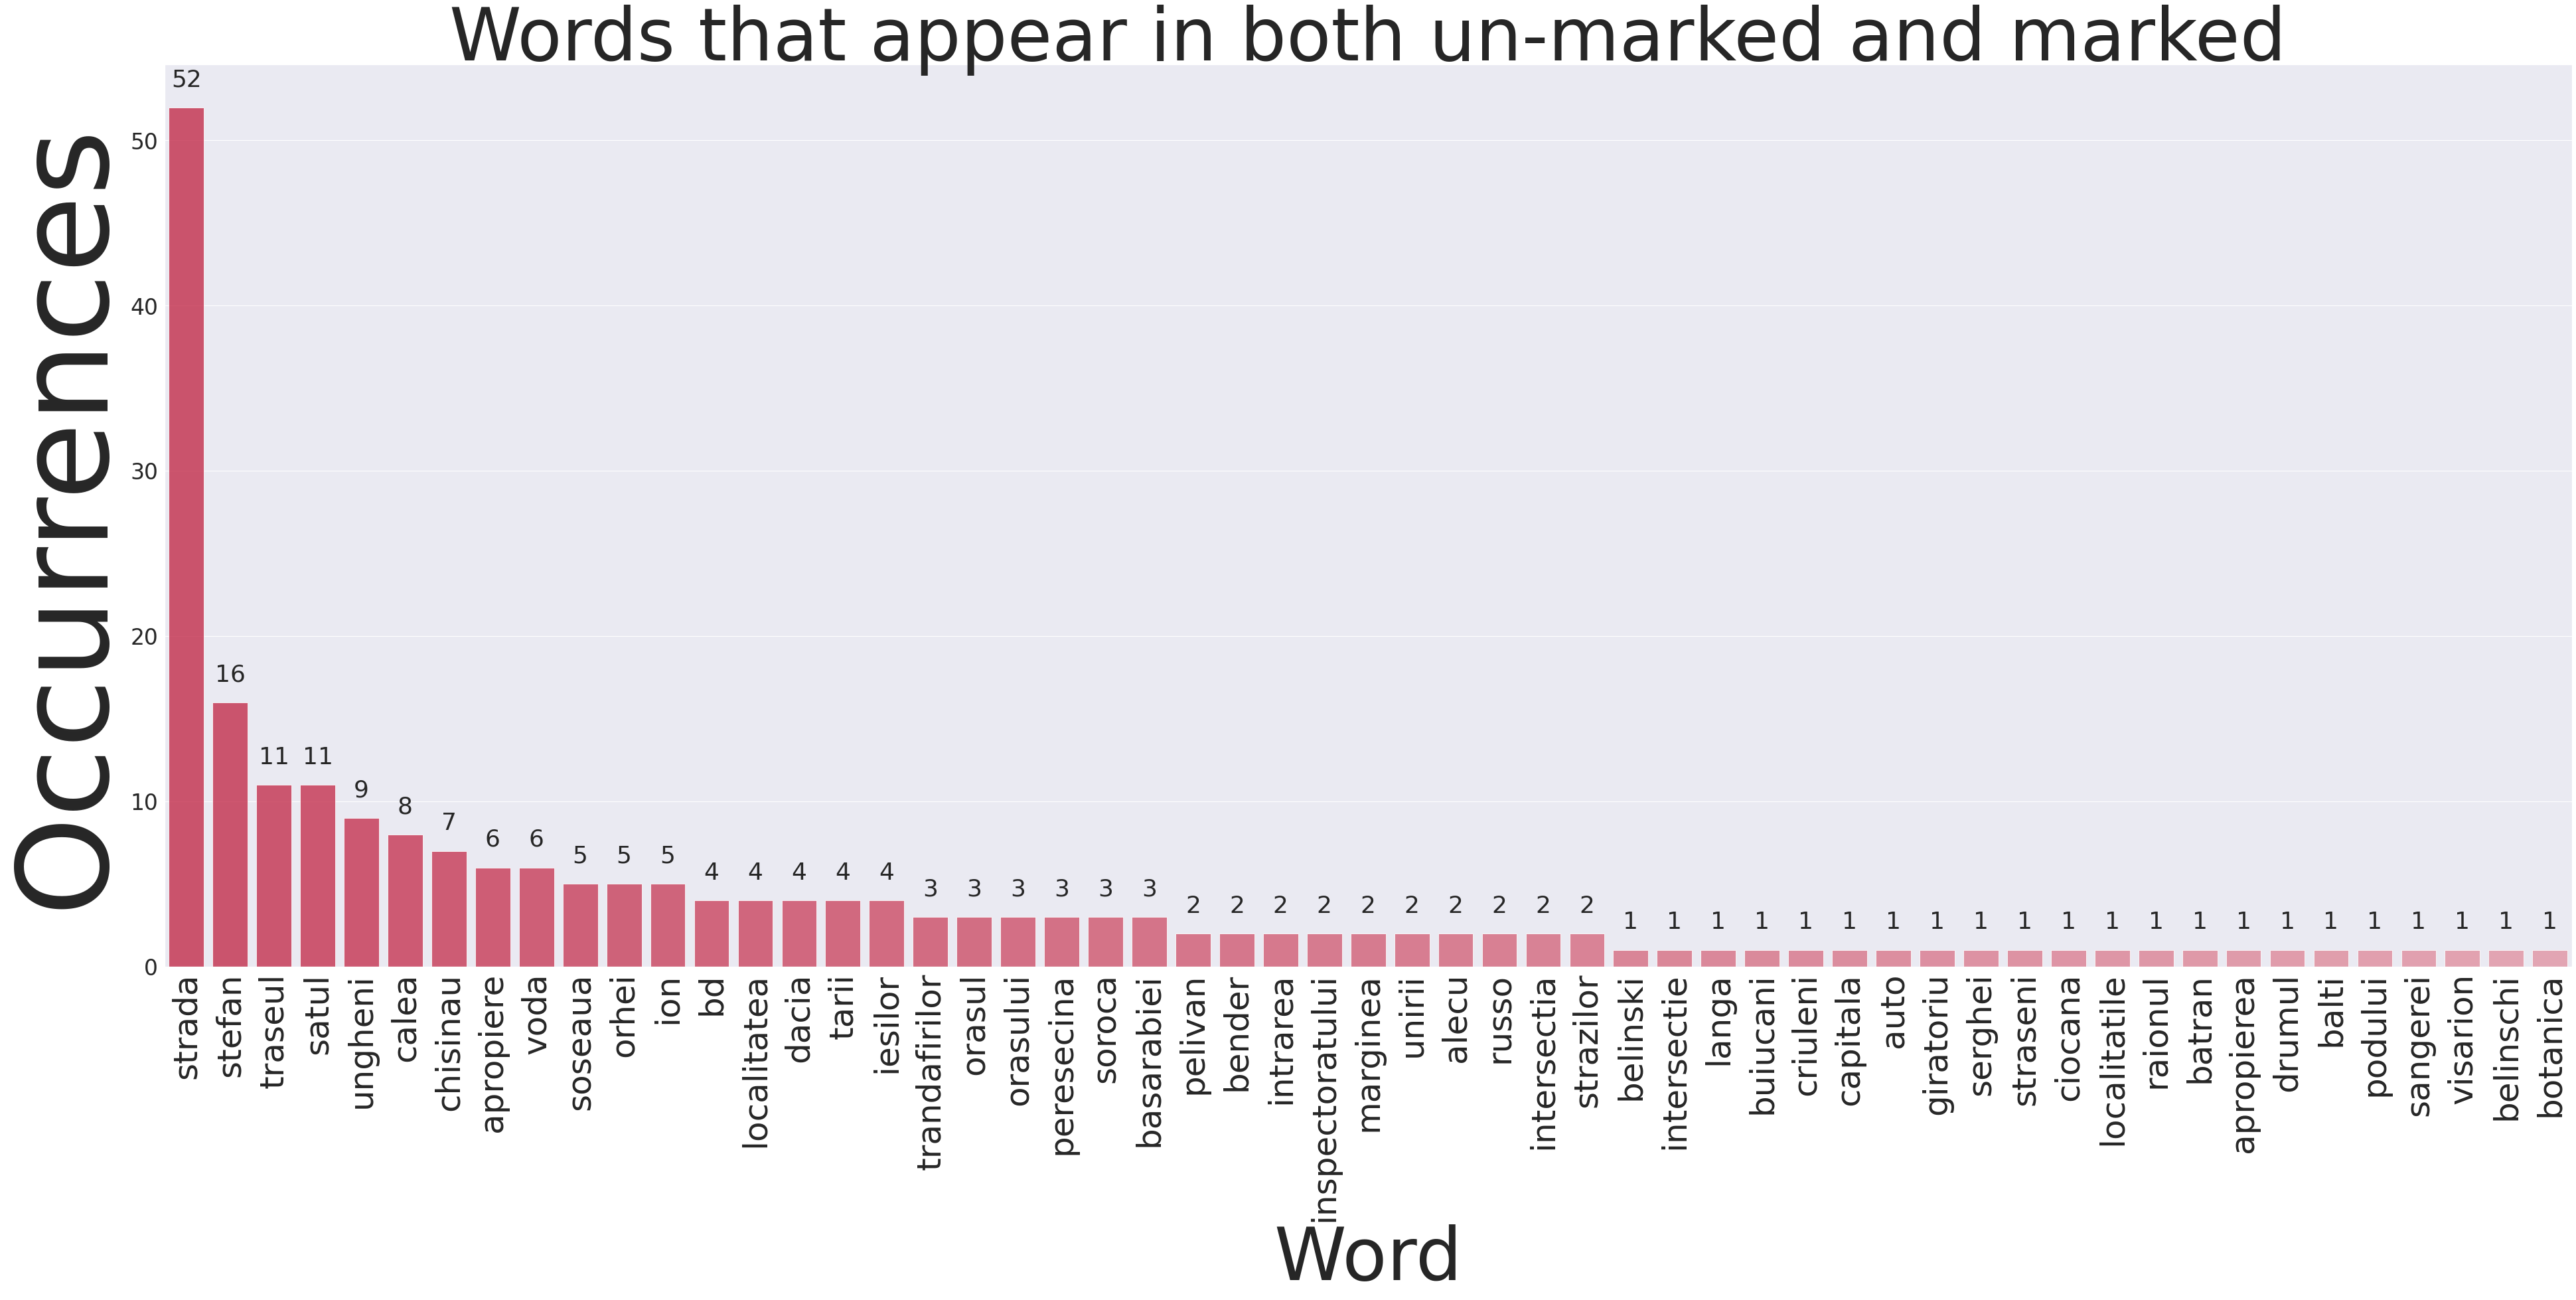

In [12]:
words_that_appear_in_both = get_words_appearing_in_both(all_unmarked_text,all_marked_text)
# print(words_that_appear_in_both)
generate_cloud(words_that_appear_in_both)
plot_word_freq(words_that_appear_in_both, title='Words that appear in both un-marked and marked')

In [13]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy

# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words


# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text']#.apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [14]:
df['text_no_sw_no_bars'] = df['text_no_sw'].str.replace('|','')
df['text_no_sw_no_bars'] = df.text_no_sw.str.replace('[^a-zA-Z]', ' ')


df.head()

,id,y,text,com,text_no_sw,all_enteties,all_non_enteties,num_all_enteties,num_all_non_enteties,text_no_sw_no_bars
0,0,1,un sofer a tamponat o femeie pe trecerea pieto...,NaN,un sofer a tamponat o femeie pe trecerea pieto...,"[bd, decebal, strada, trandafirilor]","[sofer, tamponat, femeie, trecerea, pietoni, i...",4,15,un sofer a tamponat o femeie pe trecerea pieto...
1,1,1,aseara jurul orei 2330 politia capitalei a fos...,NaN,aseara jurul orei 2330 politia capitalei a fos...,"[traseul, spre, localitatea, cheltuitori]","[aseara, jurul, orei, 2330, politia, capitalei...",4,20,aseara jurul orei politia capitalei a fos...
2,6,1,accidentul s a intamplat aceasta dimineata pe ...,NaN,accidentul s a intamplat aceasta dimineata pe ...,"[soseaua, muncesti]","[accidentul, intamplat, dimineata, capitala]",2,4,accidentul s a intamplat aceasta dimineata pe ...
3,7,1,un pieton a fost spulberat mortal aseara un ta...,NaN,un pieton a fost spulberat mortal aseara un ta...,"[soseaua, muncesti]","[pieton, spulberat, mortal, aseara, taxi, acci...",2,11,un pieton a fost spulberat mortal aseara un ta...
4,10,1,accidentul a avut loc sectorul botanica pe ||s...,NaN,accidentul a avut loc sectorul botanica pe ||s...,"[strada, trandafirilor]","[accidentul, loc, sectorul, botanica, jurul, o...",2,7,accidentul a avut loc sectorul botanica pe s...
...,...,...,...,...,...,...,...,...,...,...
150,370,1,intersectia strazilor ||vadul|| ||lui|| ||voda...,NaN,intersectia strazilor ||vadul|| ||lui|| ||voda...,"[vadul, lui, voda, mesterul, manole]","[intersectia, strazilor, capitala, inregistrat...",5,11,intersectia strazilor vadul lui voda...
151,371,1,un accident lant a avut loc aceasta dimineata ...,NaN,un accident lant a avut loc aceasta dimineata ...,"[strada, vadul, lui, voda]","[accident, lant, loc, dimineata, capitala, urm...",4,9,un accident lant a avut loc aceasta dimineata ...
152,373,1,potrivt politei accidentul a avut loc acum o o...,NaN,potrivt politei accidentul a avut loc acum o o...,"[podul, muncesti, gradina, botanica]","[potrivt, politei, accidentul, loc, ora, inter...",4,14,potrivt politei accidentul a avut loc acum o o...
153,375,1,accidentul s a produs astazi intersectia ||bul...,NaN,accidentul s a produs astazi intersectia ||bul...,"[bulevardului, stefan, cel, mare, strada, miha...","[accidentul, produs, intersectia, automobil, c...",7,12,accidentul s a produs astazi intersectia bul...


## Iterate over all rows in "df['text_no_sw_no_bars']" and highlight the entities

In [20]:
# # TIME TO DETECT ENTITIES 
detect_entities_in_dataframe(df['text_no_sw_no_bars'].head())

[(sofer, 'PERSON'), (femeie, 'PERSON'), (bd, 'LOC'), (decebal, 'LOC'), (  , 'LOC'), (cu, 'LOC'), (  , 'LOC'), (strada, 'LOC'), (    , 'LOC'), (trandafirilor, 'LOC'), (  , 'LOC'), (potrivit, 'LOC')]


[(aseara, 'DATETIME'), (jurul, 'DATETIME'), (orei, 'DATETIME'), (     , 'DATETIME'), (politia, 'DATETIME'), (capitalei, 'DATETIME'), (alertata, 'ORGANIZATION'), (automobil, 'PRODUCT'), (cheltuitori, 'PERSON'), (  , 'PERSON'), (persoane, 'PERSON'), (trei, 'NUMERIC_VALUE')]


[]


[(pieton, 'PERSON'), (aseara, 'DATETIME'), (taxi, 'PRODUCT')]


[(sectorul, 'LOC'), (botanica, 'LOC'), (strada, 'LOC'), (    , 'LOC'), (trandafirilor, 'LOC'), (  , 'LOC'), (jurul, 'LOC'), (orei, 'LOC'), (     , 'LOC')]


In [16]:
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

['tagger', 'parser', 'ner']

In [17]:
# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("accidentul s a intamplat aceasta dimineata apropiere comunei tohatin")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

tohatin 61 68 GPE


In [18]:
import re

cleaned_data= df['text_no_sw'][13]
split = cleaned_data.split(" ")
cleaned_data_no_bars = cleaned_data.replace("|","")
# Check the text that gooing to be transformed
print(cleaned_data)
print(30*"---")
print(cleaned_data_no_bars)
print(30*"---")

def change_to_training_format(passed_data):
    last_len = 0
    key_words = []
    position = []
    entities = [] 
    for i in passed_data:
        i_processed = i.replace("||","")
        if "|" in i:
            start = last_len + 1
            finish = last_len + len(i_processed)
            last_len += len(i_processed) + 1

            entities.append((start, finish, 'LOC'))
            position.append(start)
            position.append(finish)
        else: 
            last_len += len(i_processed) + 1

#     training_data = (f"('{cleaned_data_no_bars}'",{'entities': entities})
#     print(type(training_data))
    print(entities)
    print(40*"---")
#     print(f"('{cleaned_data_no_bars}'",{'entities': entities})
    # training row format
    print("('{}',{{'entities':{}}})".format(cleaned_data_no_bars, entities))
    

    #         "accidentul mihai viteazul din capitala",{"entities": [(6,15, "LOC"), (16,24, "LOC")]}),
    
change_to_training_format(split)

accidentul a avut loc aseara pe ||strada|| ||calea|| ||iesilor|| din sectorul buiucani al capitalei trecatorii au fost primii care au scos victimele din automobilele avariate "soferul era rasufla n
------------------------------------------------------------------------------------------
accidentul a avut loc aseara pe strada calea iesilor din sectorul buiucani al capitalei trecatorii au fost primii care au scos victimele din automobilele avariate "soferul era rasufla n
------------------------------------------------------------------------------------------
[(33, 38, 'LOC'), (40, 44, 'LOC'), (46, 52, 'LOC')]
------------------------------------------------------------------------------------------------------------------------
('accidentul a avut loc aseara pe strada calea iesilor din sectorul buiucani al capitalei trecatorii au fost primii care au scos victimele din automobilele avariate "soferul era rasufla n',{'entities':[(33, 38, 'LOC'), (40, 44, 'LOC'), (46, 52, 'LOC')]})


Create a pandas data-frame
-------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
|Phrase                 |Key_words            |How_many_keywords |          How_many_non_keywords          |
|ozdova raionul floresti|['ozdova','floresti']|len([Key_words])=2|len(WORDS_IN_Phrase) - len([Key_words])=1|

In [19]:
# lists
'''
TRAIN_DATA = [
    ('Who is Nishanth?', {'entities': [(7, 15, 'PERSON')]}),('Who is Kamal Khumar?', {'entities': [(7, 19, 'PERSON')]}),
    ('I like London and Berlin.', {'entities': [(7, 13, 'LOC'), (18, 24, 'LOC')]})
]
'''
phrase = "how much for the maple syrup? $20.99? That's ridiculous!!!"
def make_training_format(s):
    s = re.sub(r'[^\w]', ' ', s)
    return s
make_training_format(phrase)

'how much for the maple syrup   20 99  That s ridiculous   '